In [187]:
"""IMPORTAR BIBLIOTECAS"""
import pandas as pd  # Pandas es una biblioteca de Python utilizada para el análisis y manipulación de datos tabulares.

import numpy as np  # NumPy es una biblioteca fundamental para cálculos numéricos en Python, especialmente para operaciones con matrices y arreglos.

import statsmodels.api as sm  # Statsmodels es una biblioteca de Python que proporciona clases y funciones para la estimación de modelos estadísticos y pruebas de hipótesis.

import plotly.graph_objs as go  # Plotly es una biblioteca de visualización de datos interactiva en Python que permite crear gráficos interactivos y visualizaciones en línea.

from sklearn.model_selection import train_test_split  # Scikit-learn es una biblioteca de aprendizaje automático en Python que proporciona herramientas para dividir conjuntos de datos en conjuntos de entrenamiento y prueba.

from sklearn.linear_model import LinearRegression  # Scikit-learn también proporciona implementaciones de varios algoritmos de aprendizaje automático, incluido el modelo de regresión lineal.

from sklearn.metrics import mean_squared_error, r2_score  # Scikit-learn incluye métricas comunes para evaluar el rendimiento de los modelos, como el error cuadrático medio (mean_squared_error) y el coeficiente de determinación (r2_score).

import matplotlib.pyplot as plt  # Matplotlib es una biblioteca de visualización de datos en Python que se utiliza para crear gráficos estáticos, como gráficos de líneas, histogramas, gráficos de dispersión, etc.

import seaborn as sns  # Seaborn es una biblioteca de visualización de datos en Python basada en Matplotlib, que proporciona una interfaz de alto nivel para crear gráficos estadísticos atractivos.

import sklearn  # Scikit-learn es una biblioteca de aprendizaje automático en Python que incluye una amplia gama de algoritmos de aprendizaje supervisado y no supervisado, así como utilidades para preprocesamiento y evaluación de datos.

In [89]:
"""Cargar archivos CSV desde el disco local C"""
df2 = pd.read_csv('C:/CAR DETAILS FROM CAR DEKHO.csv')
df3 = pd.read_csv('C:/Car details v3.csv')
df4 = pd.read_csv('C:/car details v4.csv')

In [90]:
"""Cambiar el nombre de algunas columna en cada DataFrame"""
df4 = df4.rename(columns={'Kilometer': 'km_driven'})
df4 = df4.rename(columns={'Fuel Type': 'fuel'})
df4 = df4.rename(columns={'Year': 'year'})
df4 = df4.rename(columns={'Seller Type': 'seller_type'})
df4 = df4.rename(columns={'Transmission': 'transmission'})
df4 = df4.rename(columns={'Owner': 'owner'})

In [91]:
"""Combinar las dos columnas y modificar el nombre de la columna resultante en el DataFrame."""
df4 = df4.assign(nueva_columna=df4['Make'] + df4['Model'])

In [92]:
"""Borrar las columnas originales"""
df4 = df4.drop(columns=['Make', 'Model'])


In [93]:
"""Modificar el nombre de la columna resultante"""
df4 = df4.rename(columns={'name': 'name'})


In [94]:
"""Usamos Concatenacion los DataFrames"""
df_concatenado = pd.concat([df2, df3, df4], ignore_index=True)

In [95]:
"""Columnas a eliminar"""
columnas_a_eliminar = ['nueva_columna','mileage', 'engine', 'max_power', 'torque', 'seats', 'Price', 'Location', 'Color', 
                       'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

In [96]:
"""Borrar ciertas columnas"""
df_concatenado = df_concatenado.drop(columns=columnas_a_eliminar)


In [97]:
"""Borrrar columnas con valores faltantes"""
df_concatenado.dropna(inplace=True)

In [98]:
#DataFrame concatenado después de borrar las columnas:
print("Observar las entradas iniciales de los datos.")
print("\n")
print(df_concatenado.head())
print("\n")

print("Breve resumen de los datos.")
print("\n")
print(df_concatenado.describe())
print("\n")

print("Información de los datos.")
print("\n")
print(df_concatenado.info())
print("\n")

Observar las entradas iniciales de los datos.


                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007        60000.0      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007       135000.0      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012       600000.0     100000  Diesel   
3    Datsun RediGO T Option  2017       250000.0      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014       450000.0     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


Breve resumen de los datos.


               year  selling_price     km_driven
count  12468.000000   1.246800e+04  1.246800e+04
mean    2013.555743   5.915773e+05  6.856508e+04
std        4.118485   7.377876e+05  5.333721e+04
min     1983.000000   2.000000e+04  1.0

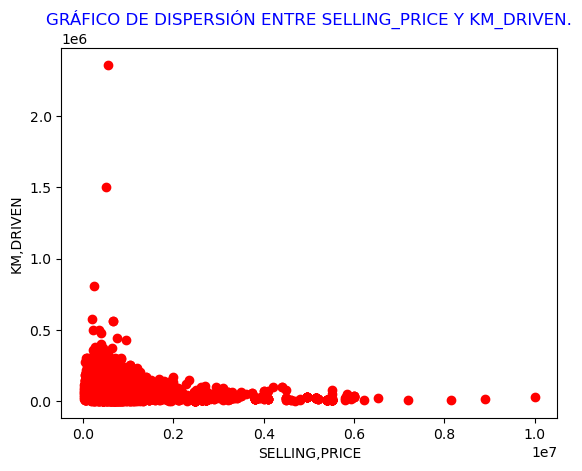

In [185]:
# Gráficos de dispersión entre variables
plt.scatter(df_concatenado['selling_price'], df_concatenado['km_driven'], color = "red")
plt.xlabel('SELLING,PRICE')
plt.ylabel('KM,DRIVEN')
plt.title('GRÁFICO DE DISPERSIÓN ENTRE SELLING_PRICE Y KM_DRIVEN.', color = "blue")
plt.show()

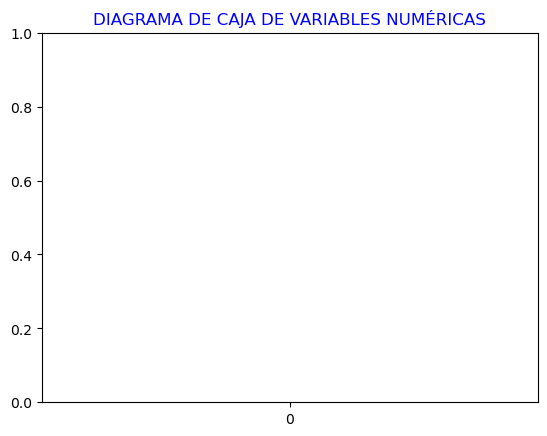

In [178]:
# Diagrama de caja para detectar valores atípicos
sns.boxplot(df_concatenado='selling_price')
plt.title('DIAGRAMA DE CAJA DE VARIABLES NUMÉRICAS', color= "blue")
plt.show()

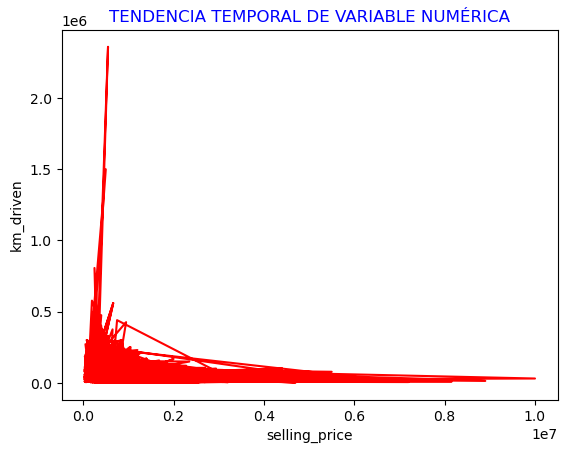

In [177]:
# Gráfico de línea para visualizar tendencia temporal
plt.plot(df_concatenado['selling_price'], df_concatenado['km_driven'], color= "red")
plt.title('TENDENCIA TEMPORAL DE VARIABLE NUMÉRICA', color = "blue")
plt.xlabel('selling_price')
plt.ylabel('km_driven')
plt.show()

In [102]:
# Identificar valores faltantes
missing_values = df_concatenado.isnull().sum()
print("Valores Faltantes")
print(missing_values)

Valores Faltantes
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [103]:
# Eliminar filas con valores faltantes
data_clean = df_concatenado.dropna()

In [104]:
# Selecciona las características independientes
X = df_concatenado[['year', 'km_driven']]  

In [105]:
# Selecciona la variable objetivo
y = df_concatenado['selling_price']  

In [106]:
#Dividir el dataset en Train y Test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
"""Entrenar el modelo de regresion lineal"""
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [110]:
#Realizar predicciones
y_pred = model.predict(X_test)

In [115]:
# Calcula el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)

print("\n")
print('Error cuadrático medio:', mse)
print('Coeficiente de determinación (R^2):', r2)



Error cuadrático medio: 382984783180.44366
Coeficiente de determinación (R^2): 0.16730354652224078


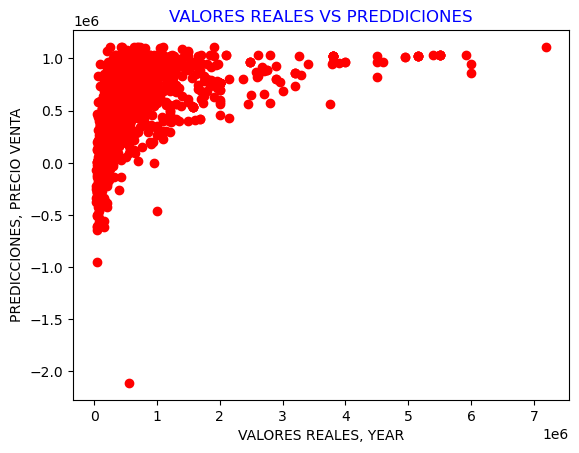

In [184]:
#Diagrama de dispercion
plt.scatter(y_test, y_pred, color= "red")
plt.xlabel("VALORES REALES, YEAR")
plt.ylabel("PREDICCIONES, PRECIO VENTA")
plt.title("VALORES REALES VS PREDDICIONES", color= "blue")
plt.show()

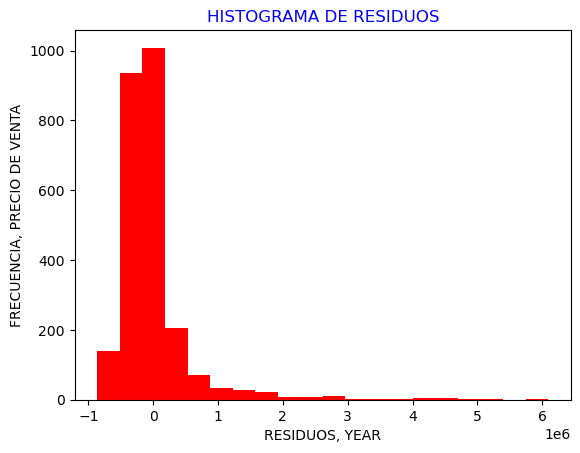

In [183]:
#Histograma
residuos = y_test - y_pred
plt.hist(residuos, bins=20, color='red')
plt.xlabel("RESIDUOS, YEAR")
plt.ylabel("FRECUENCIA, PRECIO DE VENTA")
plt.title("HISTOGRAMA DE RESIDUOS", color= "blue")
plt.show()


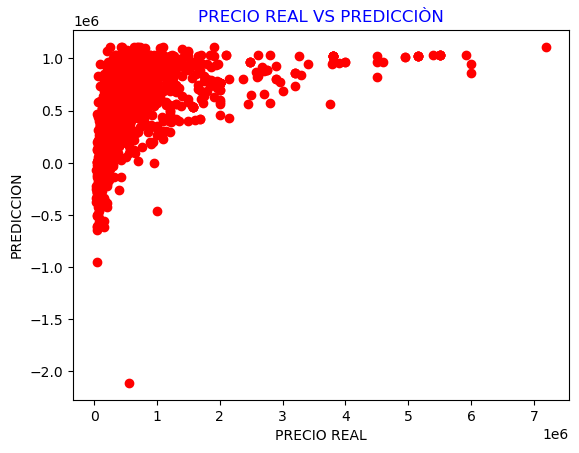

In [189]:
"""Representacion grafica de regresion Lineal"""
plt.scatter(y_test, y_pred, color="red")
plt.xlabel("PRECIO REAL")
plt.ylabel("PREDICCION")
plt.title("PRECIO REAL VS PREDICCIÒN", color= "blue")
plt.show()

In [ ]:
"""HUMBERTO JOSE RINCON MORA"""